In [6]:
from gensim.models import Word2Vec 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import sys
import nltk

In [7]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [8]:
df = pd.read_csv("../data/drake-songs-spotify.csv", index_col=0)

song_words = []

for index, row in df.iterrows():
    song_words.append(row["lyrics"].lower().split())

/home/julian/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


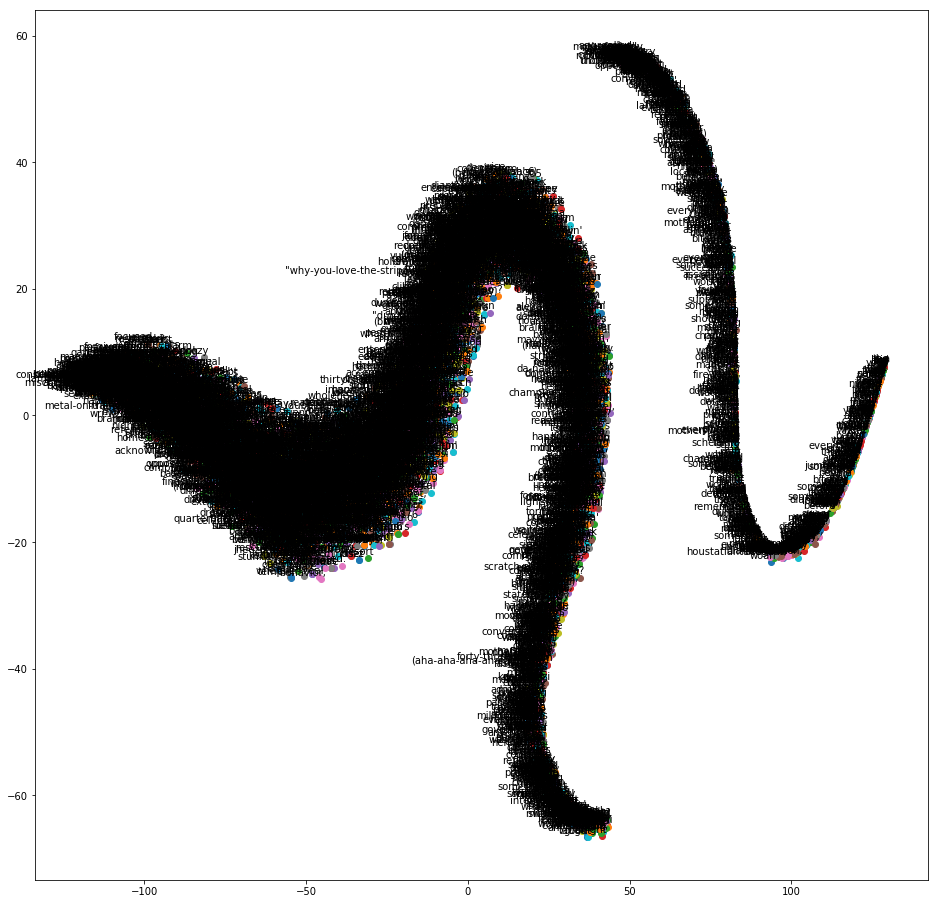

In [9]:
model = Word2Vec(song_words, min_count=1)

tsne_plot(model)